<a href="https://colab.research.google.com/github/eileenanindya/BigDataAnalytics/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import DBSCAN


In [92]:
file_path = '/content/sumber_rejeki_dataset.csv'

In [93]:
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Problem parsing the CSV file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [94]:
data_cleaned = data.drop_duplicates()
data_cleaned['order_date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(data_cleaned['order_date'], unit='D')
data_cleaned['berat(kg)'].fillna('none', inplace=True)
data_cleaned['price_per_unit'] = data_cleaned['harga_total'] / data_cleaned['quantity']
data_cleaned['price_per_unit'].replace([float('inf'), -float('inf')], 0, inplace=True)
data_cleaned['price_per_unit'] = data_cleaned['price_per_unit'].round(0).astype(int)
data_cleaned.drop(['order_details_id'], axis=1, inplace=True)
data_cleaned.to_csv('cleaned_sumber_rejeki_dataset.csv', index=False)

print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_date         388 non-null    datetime64[ns]
 1   order_id           388 non-null    int64         
 2   item_id            388 non-null    int64         
 3   item_name          388 non-null    object        
 4   quantity           388 non-null    int64         
 5   berat(kg)          388 non-null    object        
 6   harga_total        388 non-null    int64         
 7   bentuk_pembayaran  388 non-null    object        
 8   price_per_unit     388 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 27.4+ KB
None
  order_date  order_id  item_id       item_name  quantity berat(kg)  \
0 2024-11-27      1001        1            ikan         3       1.3   
1 2024-11-27      1001        5    ongkos bakar         1      none   
2 2

<ipython-input-94-d25cc9f6ffbc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['berat(kg)'].fillna('none', inplace=True)
<ipython-input-94-d25cc9f6ffbc>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'none' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_cleaned['berat(kg)'].fillna('none', inplace=True)
<ipython-input-94-d25cc9f6ffbc>:7: FutureWarning: A value is trying to be set on

In [95]:
file_path = "/content/cleaned_sumber_rejeki_dataset.csv"
data = pd.read_csv(file_path)

SVM

In [96]:
# Asumsi dataset memiliki kolom 'quantity' dan 'harga_total'
# Menambahkan label kategori pembeli: besar vs kecil
data['label'] = np.where(data['harga_total'] > 100000, 'Pembeli Besar', 'Pembeli Kecil')

# Fitur: quantity dan harga_total
X = data[['quantity', 'harga_total']]
y = data['label']

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Membangun model SVM untuk klasifikasi
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluasi model
print("Akurasi pada data test:", svm_model.score(X_test, y_test))


Akurasi pada data test: 0.9871794871794872


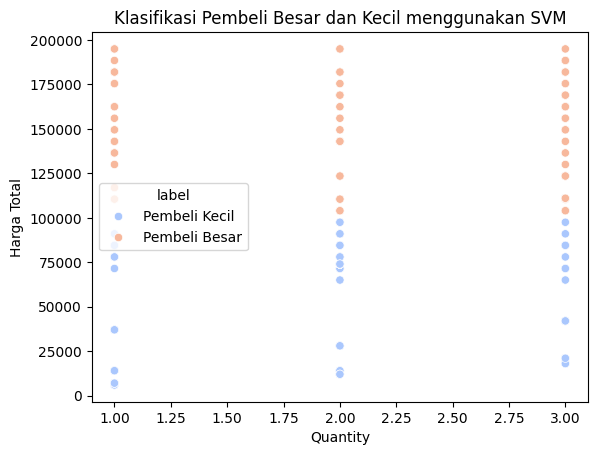

In [97]:
# Visualisasi hasil klasifikasi
sns.scatterplot(x='quantity', y='harga_total', hue='label', data=dataset, palette='coolwarm')
plt.title('Klasifikasi Pembeli Besar dan Kecil menggunakan SVM')
plt.xlabel('Quantity')
plt.ylabel('Harga Total')
plt.show()


Accuracy on test data: 0.7948717948717948


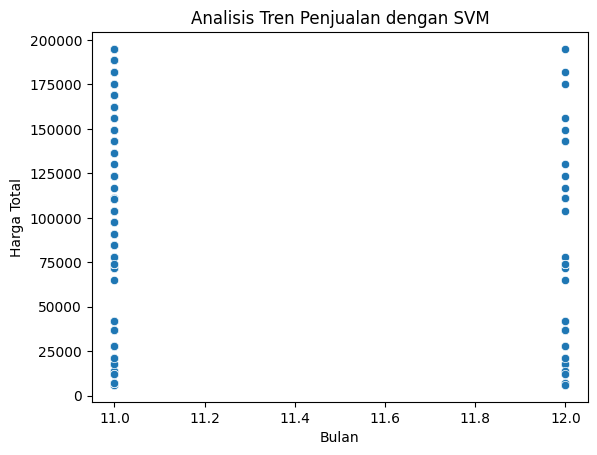

In [99]:
# Convert 'order_date' to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

# Extract 'month' from 'order_date'
data['month'] = data['order_date'].dt.month

# Prepare features and target variable
X = data[['month', 'harga_total']]
y = np.where(data['harga_total'].shift(-1) > data['harga_total'], 1, 0)  # 1 if sales increase, 0 if decrease

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate the model
print("Accuracy on test data:", svm_model.score(X_test, y_test))

# Plot scatterplot
sns.scatterplot(x='month', y='harga_total', data=data)
plt.title('Analisis Tren Penjualan dengan SVM')
plt.xlabel('Bulan')
plt.ylabel('Harga Total')
plt.show()


KNN

Mean Squared Error: 5304743.58974359
R^2 Score: 0.9980535069287824


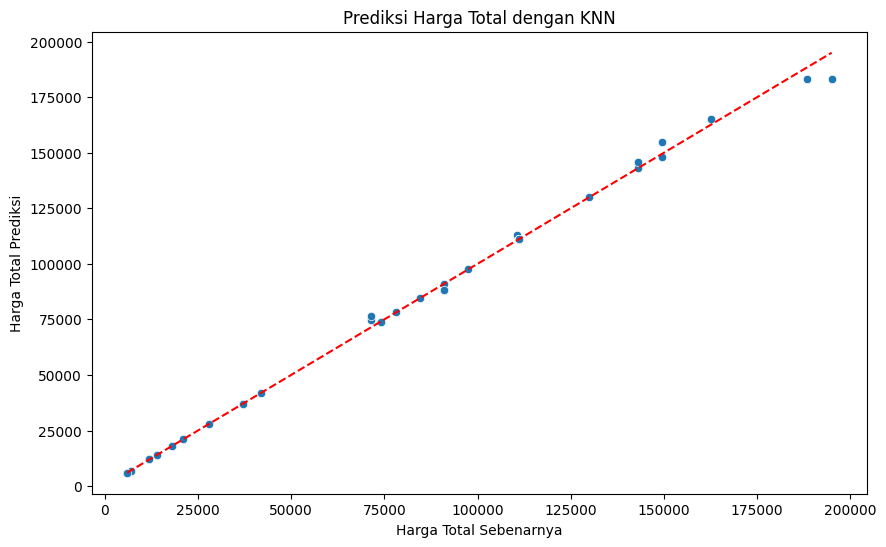

In [100]:
# Tentukan Fitur dan Target
X = data[['quantity', 'berat(kg)', 'price_per_unit']]  # Ambil fitur yang numerik
y = data['harga_total']  # Target yang ingin diprediksi (harga_total)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)  # Anda bisa mengubah jumlah neighbors
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 Score

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualisasi Hasil Prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Harga Total Sebenarnya')
plt.ylabel('Harga Total Prediksi')
plt.title('Prediksi Harga Total dengan KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis referensi
plt.show()

DBSCAN

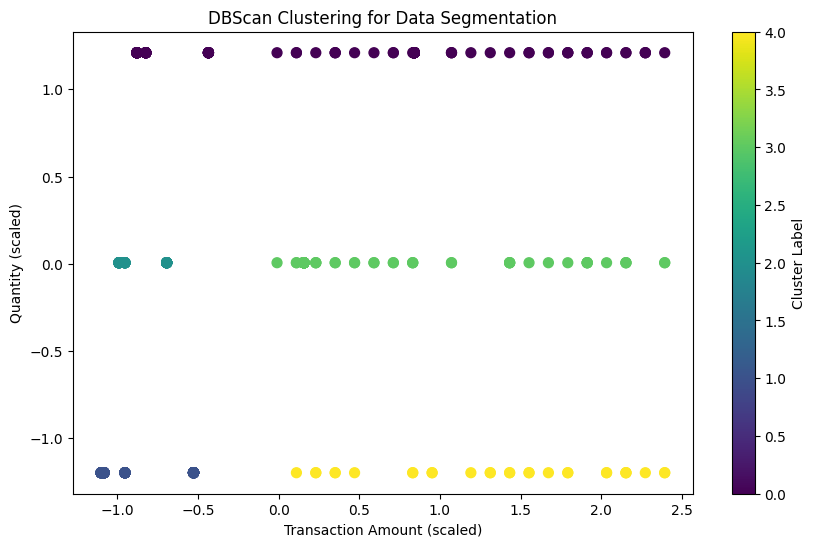

In [101]:
# Data Selection: Pilih fitur numerik untuk clustering
selected_features = data[['harga_total', 'quantity']]

# Handle missing values if any
selected_features = selected_features.dropna()

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(selected_features)

# Apply DBScan
# Tune eps (radius of neighborhood) and min_samples (minimum points in a cluster) for better results
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
clusters = dbscan.fit_predict(features_scaled)

# Add cluster labels to the original dataset
selected_features['cluster'] = clusters

# Visualize the clustering results (using two features)
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBScan Clustering for Data Segmentation')
plt.xlabel('Transaction Amount (scaled)')
plt.ylabel('Quantity (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()

In [102]:
# Save the dataset with cluster labels to review the results
selected_features.to_csv('clustered_segmentation_analysis.csv', index=False)
print("Clustering complete. Results saved to 'clustered_segmentation_analysis.csv'.")

Clustering complete. Results saved to 'clustered_segmentation_analysis.csv'.
